In [1]:
# Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df=pd.read_csv('Cars (Tomilovych, EC-61).csv', sep=';')

In [4]:
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,other,gas,std,two,other,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,other,gas,std,two,other,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,other,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,other,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,other,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [5]:
df[['wheel-base','length','width','height','curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Cheking NaN
nan_by_column=df.isnull().sum()
print(nan_by_column)

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64


In [7]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
#strings
imputer_freq=SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(df[['num-of-doors']])
df[['num-of-doors']]=imputer_freq.fit_transform(df[['num-of-doors']])
#numeric
df[['bore']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['bore']])
df[['bore']]=round(df[['bore']], 2)
df[['stroke']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['stroke']])
df[['stroke']]=round(df[['stroke']], 2)
df[['horsepower']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['horsepower']])
df[['horsepower']]=round(df[['horsepower']])
df[['peak-rpm']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['peak-rpm']])
df[['peak-rpm']]=round(df[['peak-rpm']])
df[['price']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['price']])
df[['price']]=round(df[['price']])

In [8]:
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,other,gas,std,two,other,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,other,gas,std,two,other,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,other,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,other,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,other,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [9]:
# Encoding categorical data
# Encoding categorical features with 2 levels
from sklearn.preprocessing import LabelEncoder
df[['fuel-type']]=LabelEncoder().fit_transform(df[['fuel-type']])
df[['aspiration']]=LabelEncoder().fit_transform(df[['aspiration']])
df[['num-of-doors']]=LabelEncoder().fit_transform(df[['num-of-doors']])
df[['engine-location']]=LabelEncoder().fit_transform(df[['engine-location']])
# Encoding categorical features with more than 2 levels
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder().fit_transform(df[['make']]).toarray()
df=pd.get_dummies(df, prefix='make', prefix_sep='.', columns=['make'])
df.drop('make.other', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['body-style']]).toarray()
df=pd.get_dummies(df, prefix='body-style', prefix_sep='.', columns=['body-style'])
df.drop('body-style.other', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['drive-wheels']]).toarray()
df=pd.get_dummies(df, prefix='drive-wheels', prefix_sep='.', columns=['drive-wheels'])
df.drop('drive-wheels.4wd', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['engine-type']]).toarray()
df=pd.get_dummies(df, prefix='engine-type', prefix_sep='.', columns=['engine-type'])
df.drop('engine-type.other', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['num-of-cylinders']]).toarray()
df=pd.get_dummies(df, prefix='num-of-cylinders', prefix_sep='.', columns=['num-of-cylinders'])
df.drop('num-of-cylinders.fewer than four', axis=1, inplace=True)

OneHotEncoder().fit_transform(df[['fuel-system']]).toarray()
df=pd.get_dummies(df, prefix='fuel-system', prefix_sep='.', columns=['fuel-system'])
df.drop('fuel-system.other', axis=1, inplace=True)

C:\Users\TOV\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [10]:
# Moving variable 'price' in the end of dataframe
price=df['price']
df.drop('price', axis=1, inplace=True)
df['price']=price

In [11]:
df

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,13495.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,16500.0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,16500.0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,0,0,1,13950.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,1,0,0,0,0,0,1,16845.0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0,0,1,0,0,0,0,0,1,19045.0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,1,0,0,0,1,0,0,0,1,21485.0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,1,0,0,1,0,22470.0


In [12]:
df[['wheel-base','length','width','height','curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255512,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313598,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


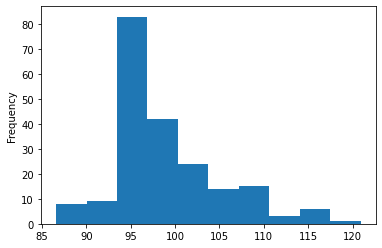

In [13]:
# Wheel base distribution
df['wheel-base'].plot(kind='hist')

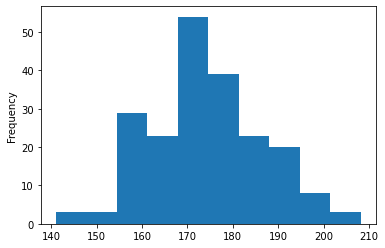

In [14]:
# Length distribution
df['length'].plot(kind='hist')

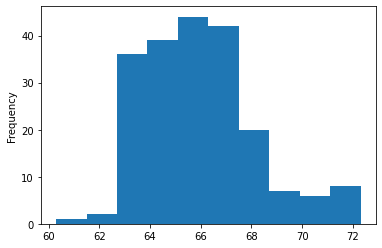

In [15]:
# Width distribution
df['width'].plot(kind='hist')

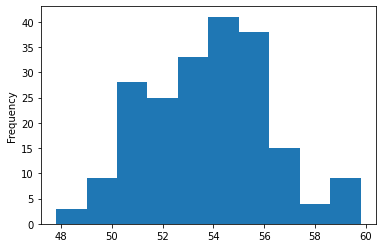

In [16]:
# Height distribution
df['height'].plot(kind='hist')

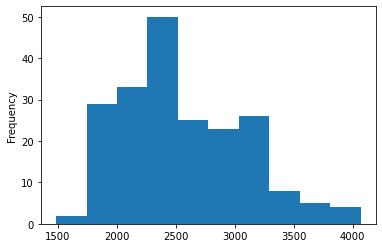

In [17]:
# Curb Weight distribution
df['curb-weight'].plot(kind='hist')

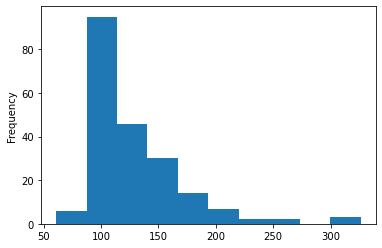

In [18]:
# Engine size distribution
df['engine-size'].plot(kind='hist')

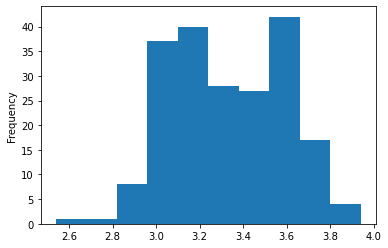

In [19]:
# Bore distribution
df['bore'].plot(kind='hist')

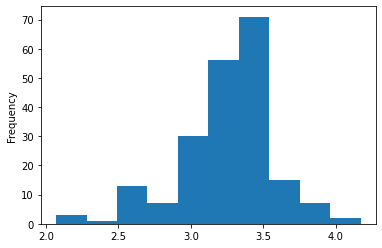

In [20]:
# Stroke distribution
df['stroke'].plot(kind='hist')

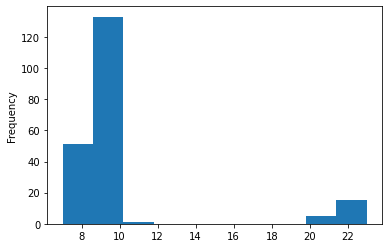

In [21]:
# Compression ratio distribution
df['compression-ratio'].plot(kind='hist')

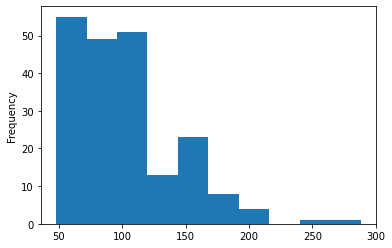

In [22]:
# Horsepower distribution
df['horsepower'].plot(kind='hist')

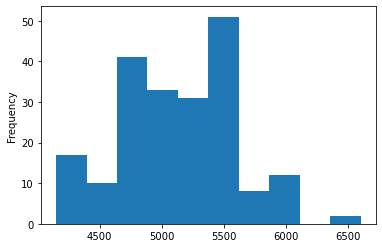

In [23]:
# Peak rpm distribution
df['peak-rpm'].plot(kind='hist')

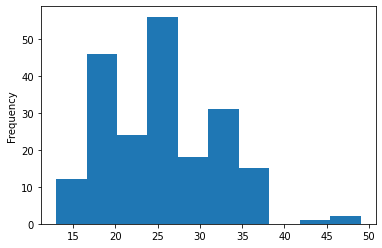

In [24]:
# City mpg distribution
df['city-mpg'].plot(kind='hist')

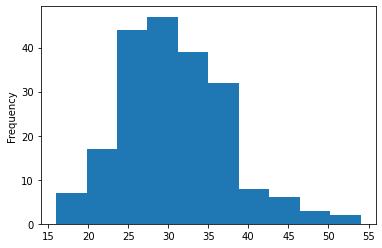

In [25]:
# Highway mpg distribution
df['highway-mpg'].plot(kind='hist')

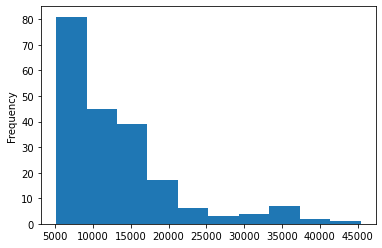

In [26]:
# Price distribution
df['price'].plot(kind='hist')

In [27]:
# Outliers
dfold=df
print('Outliers:')
bases=[]
i=0
j=0
for base in df['wheel-base']:
    if base>round(df['wheel-base'].mean()+3*df['wheel-base'].std(), 1):
        base=round(df['wheel-base'].mean()+3*df['wheel-base'].std(), 1)
        i=i+1
    elif base<round(df['wheel-base'].mean()-3*df['wheel-base'].std(), 1):
        base=round(df['wheel-base'].mean()-3*df['wheel-base'].std(), 1)
        i=i+1
    bases.append(base)
print('wheel_base '+str(i))
j=j+i
df['wheel-base']=bases

lengths=[]
for lng in df['length']:
    i=0
    if lng>round(df['length'].mean()+3*df['length'].std(), 1):
        lng=round(df['length'].mean()+3*df['length'].std(), 1)
        i=i+1
    elif lng<round(df['length'].mean()-3*df['length'].std(), 1):
        lng=round(df['length'].mean()-3*df['length'].std(), 1)
        i=i+1
    lengths.append(lng)
print('length '+str(i))
j=j+i
df['length']=lengths

widths=[]
i=0
for wid in df['width']:
    if wid>round(df['width'].mean()+3*df['width'].std(), 1):
        wid=round(df['width'].mean()+3*df['width'].std(), 1)
        i=i+1
    elif wid<round(df['width'].mean()-3*df['width'].std(), 1):
        wid=round(df['width'].mean()-3*df['width'].std(), 1)
        i=i+1
    widths.append(wid)
print('width '+str(i))
j=j+i
df['width']=widths

heights=[]
i=0
for heig in df['height']:
    if heig>round(df['height'].mean()+3*df['height'].std(), 1):
        heig=round(df['height'].mean()+3*df['height'].std(), 1)
        i=i+1
    elif heig<round(df['height'].mean()-3*df['height'].std(), 1):
        heig=round(df['height'].mean()-3*df['height'].std(), 1)
        i=i+1
    heights.append(heig)
print('height '+str(i))
j=j+i
df['height']=heights

weights=[]
i=0
for weight in df['curb-weight']:
    if weight>round(df['curb-weight'].mean()+3*df['curb-weight'].std()):
        weight=round(df['curb-weight'].mean()+3*df['curb-weight'].std())
        i=i+1
    elif weight<round(df['curb-weight'].mean()-3*df['curb-weight'].std()):
        weight=round(df['curb-weight'].mean()-3*df['curb-weight'].std())
        i=i+1
    weights.append(weight)
print('curb-weight '+str(i))
j=j+i
df['curb-weight']=weights

sizes=[]
i=0
for size in df['engine-size']:
    if size>round(df['engine-size'].mean()+3*df['engine-size'].std()):
        size=round(df['engine-size'].mean()+3*df['engine-size'].std())
        i=i+1
    elif size<round(df['engine-size'].mean()-3*df['engine-size'].std()):
        size=round(df['engine-size'].mean()-3*df['engine-size'].std())
        i=i+1
    sizes.append(size)
print('engine-size '+str(i))
j=j+i
df['engine-size']=sizes

bores=[]
i=0
for br in df['bore']:
    if br>round(df['bore'].mean()+3*df['bore'].std(), 2):
        br=round(df['bore'].mean()+3*df['bore'].std(), 2)
        i=i+1
    elif br<round(df['bore'].mean()-3*df['bore'].std(), 2):
        br=round(df['bore'].mean()-3*df['bore'].std(), 2)
        i=i+1
    bores.append(br)
print('bore '+str(i))
j=j+i
df['bore']=bores

strokes=[]
i=0
for st in df['stroke']:
    if st>round(df['stroke'].mean()+3*df['stroke'].std(), 2):
        st=round(df['stroke'].mean()+3*df['stroke'].std(), 2)
        i=i+1
    elif st<round(df['stroke'].mean()-3*df['stroke'].std(), 2):
        st=round(df['stroke'].mean()-3*df['stroke'].std(), 2)
        i=i+1
    strokes.append(st)
print('stroke '+str(i))
j=j+i
df['stroke']=strokes

ratios=[]
i=0
for ratio in df['compression-ratio']:
    if ratio>round(df['compression-ratio'].mean()+3*df['compression-ratio'].std(), 2):
        ratio=round(df['compression-ratio'].mean()+3*df['compression-ratio'].std(), 2)
        i=i+1
    elif ratio<round(df['compression-ratio'].mean()-3*df['compression-ratio'].std(), 2):
        ratio=round(df['compression-ratio'].mean()-3*df['compression-ratio'].std(), 2)
        i=i+1
    ratios.append(ratio)
print('compression-ratio '+str(i))
j=j+i
df['compression-ratio']=ratios

powers=[]
i=0
for power in df['horsepower']:
    if power>round(df['horsepower'].mean()+3*df['horsepower'].std()):
        power=round(df['horsepower'].mean()+3*df['horsepower'].std())
        i=i+1
    elif power<round(df['horsepower'].mean()-3*df['horsepower'].std()):
        power=round(df['horsepower'].mean()-3*df['horsepower'].std())
        i=i+1
    powers.append(power)
print('horsepower '+str(i))
j=j+i
df['horsepower']=powers

rpms=[]
i=0
for rpm in df['peak-rpm']:
    if rpm>round(df['peak-rpm'].mean()+3*df['peak-rpm'].std()):
        rpm=round(df['peak-rpm'].mean()+3*df['peak-rpm'].std())
        i=i+1
    elif rpm<round(df['peak-rpm'].mean()-3*df['peak-rpm'].std()):
        rpm=round(df['peak-rpm'].mean()-3*df['peak-rpm'].std())
        i=i+1
    rpms.append(rpm)
print('peak-rpm '+str(i))
j=j+i
df['peak-rpm']=rpms

cmpgs=[]
i=0
for cmpg in df['city-mpg']:
    if cmpg>round(df['city-mpg'].mean()+3*df['city-mpg'].std()):
        cmpg=round(df['city-mpg'].mean()+3*df['city-mpg'].std())
        i=i+1
    elif cmpg<round(df['city-mpg'].mean()-3*df['city-mpg'].std()):
        cmpg=round(df['city-mpg'].mean()-3*df['city-mpg'].std())
        i=i+1
    cmpgs.append(cmpg)
print('city-mpg '+str(i))
j=j+i
df['city-mpg']=cmpgs

hmpgs=[]
i=0
for hmpg in df['highway-mpg']:
    if hmpg>round(df['highway-mpg'].mean()+3*df['highway-mpg'].std()):
        hmpg=round(df['highway-mpg'].mean()+3*df['highway-mpg'].std())
        i=i+1
    elif hmpg<round(df['highway-mpg'].mean()-3*df['highway-mpg'].std()):
        hmpg=round(df['highway-mpg'].mean()-3*df['highway-mpg'].std())
        i=i+1
    hmpgs.append(hmpg)
print('highway-mpg '+str(i))
j=j+i
df['highway-mpg']=hmpgs

prices=[]
i=0
for prc in df['price']:
    if prc>round(df['price'].mean()+3*df['price'].std()):
        prc=round(df['price'].mean()+3*df['price'].std())
        i=i+1
    elif prc<round(df['price'].mean()-3*df['price'].std()):
        prc=round(df['price'].mean()-3*df['price'].std())
        i=i+1
    prices.append(prc)
print('price '+str(i))
j=j+1
df['price']=prices

print('GRAND TOTAL '+str(j))

Outliers:
wheel_base 1
length 0
width 0
height 0
curb-weight 0
engine-size 5
bore 0
stroke 3
compression-ratio 9
horsepower 2
peak-rpm 2
city-mpg 2
highway-mpg 2
price 5
GRAND TOTAL 27


In [28]:
df[['wheel-base','length','width','height','curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.736585,174.049268,65.907805,53.724878,2555.565854,125.960976,3.329756,3.257854,10.110049,103.746341,5124.936585,25.190244,30.726829,13121.673171
std,5.954301,12.337289,2.145204,2.443522,520.680204,37.940336,0.270844,0.305720,3.869288,37.580163,475.663346,6.444933,6.809272,7570.378110
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.310000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,116.800000,208.100000,72.300000,59.800000,4066.000000,252.000000,3.940000,4.170000,22.060000,223.000000,6556.000000,45.000000,51.000000,36813.000000


In [29]:
df

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,13495.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,16500.0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,16500.0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,0,0,1,13950.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,1,0,0,0,0,0,1,16845.0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0,0,1,0,0,0,0,0,1,19045.0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,1,0,0,0,1,0,0,0,1,21485.0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,1,0,0,1,0,22470.0


In [30]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#dfsc=sc.fit_transform(df)
#df['wheel-base']=dfsc[:,5]
#df['length']=dfsc[:,6]
#df['width']=dfsc[:,7]
#df['height']=dfsc[:,8]
#df['curb-weight']=dfsc[:,9]
#df['engine-size']=dfsc[:,10]
#df['bore']=dfsc[:,11]
#df['stroke']=dfsc[:,12]
#df['compression-ratio']=dfsc[:,13]
#df['horsepower']=dfsc[:,14]
#df['peak-rpm']=dfsc[:,15]
#df['city-mpg']=dfsc[:,16]
#df['highway-mpg']=dfsc[:,17]
#df['price']=dfsc[:,45]

In [31]:
# Exporting the dataset
df.to_csv('Cars_prep (Tomilovych, EC-61).csv', sep=';', index=False)